In [2]:
!ls Data

'archive(1).zip'   synthetic_heart_disease_dataset.csv


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [19]:


df = pd.read_csv("Data/synthetic_heart_disease_dataset.csv")
df = df.sample(frac=1)
df.head(3).T

,21767,44444,35184
Age,59,73,33
Gender,Female,Male,Male
Weight,53,91,69
Height,158,158,197
BMI,35.7,34.8,39.7
Smoking,Never,Never,Former
Alcohol_Intake,NaN,Low,NaN
Physical_Activity,Sedentary,Active,Moderate
Diet,Average,Unhealthy,Average
Stress_Level,High,Low,Low


In [10]:

# Target column
target = "Heart_Disease"

# Separate features & target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())     # scale numeric values
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine all preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [11]:

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [16]:

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:

predictions = model.predict(X_test)
accuracy =  accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))

Accuracy: 1.0
F1 score: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5398
           1       1.00      1.00      1.00      4602

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [39]:
with open("results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")


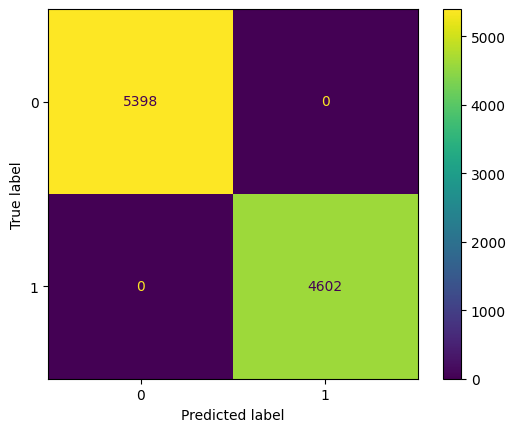

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.savefig("results/model_results.png", dpi=120)

In [52]:
import joblib
joblib.dump(model, "Model/heart_disease_model.pkl")
print("\nModel saved as heart_disease_model.pkl")


Model saved as heart_disease_model.pkl


In [53]:
!tree -L 2

.
├── App
│   ├── app.py
│   ├── README.md
│   └── requirement.txt
├── Data
│   └── synthetic_heart_disease_dataset.csv
├── heart_disease_model.pkl
├── LICENSE
├── Makefile
├── Model
│   └── heart_disease_model.pkl
├── notebook.ipynb
├── README.md
├── requirements.txt
├── results
│   ├── metrics.txt
│   └── model_results.png
├── synthetic_heart_disease_dataset.csv
├── train.py
└── venv
    ├── bin
    ├── etc
    ├── include
    ├── lib
    ├── lib64 -> lib
    ├── pyvenv.cfg
    └── share

12 directories, 16 files
